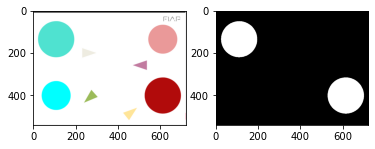

In [20]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.PNG')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv = np.array([0, 150, 0])  
image_upper_hsv = np.array([30, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)


blue = img_hsv.copy()

image_lower2_hsv = np.array([81, 162, 160])  
image_upper2_hsv = np.array([88, 182, 255])

mask_hsv2 = cv2.inRange(blue, image_lower2_hsv, image_upper2_hsv)

mask_soma = cv2.bitwise_or(mask_hsv,mask_hsv2)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_soma, cmap="Greys_r", vmin=0, vmax=255)
plt.show()


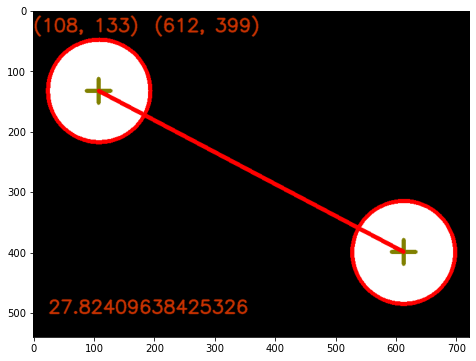

In [38]:

import math

contornos, _ = cv2.findContours(mask_soma, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_soma, cv2.COLOR_GRAY2RGB) 

contornos_img = mask_rgb.copy()

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

listaVazia = []

for x in range(len(contornos)):
    cnt = contornos[x]
    M = cv2.moments(cnt)

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    listaVazia.append((cx,cy))

    size = 20
    color = (128,128,0)

    cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)   
    cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

    font = cv2.FONT_HERSHEY_SIMPLEX
    text = cy , cx
    origem = (0,50)

cv2.line(contornos_img, listaVazia[0], listaVazia[1], (255,0,0), 5)

x1, y1 = listaVazia[0]
x2, y2 = listaVazia[1]

dx = x1 - x2
dy = y1 - y2

angle = math.atan2(dy, dx)
angle_degrees = math.degrees(angle)

font = cv2.FONT_HERSHEY_SIMPLEX
origem_angulo = (25,500)
origem1 = (200,35)
origem2 = (0,35)

texto_circulo1 = x1, y1

texto_circulo2 = x2, y2

cv2.putText(contornos_img, str(angle_degrees), origem_angulo, font, 1, (200,50,0), 2, cv2.LINE_AA)
cv2.putText(contornos_img, str(texto_circulo1), origem1, font, 1, (200,50,0), 2, cv2.LINE_AA)
cv2.putText(contornos_img, str(texto_circulo2), origem2, font, 1, (200,50,0), 2, cv2.LINE_AA)

plt.imshow(contornos_img)